In [1]:
from keras.datasets import reuters
import numpy as np
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [6]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=''.join([reverse_word_index.get(i - 3, '?')
                         for i in train_data[1]])

In [7]:
decoded_newswire

'?generaledebanquesalt?brandlthelleroverseascorpofchicagohaveeachtaken50pctstakesin?companysa?factorsgeneraledebanquesaidinastatementitgavenofinancialdetailsofthetransactionsa??turnoverin1986was175billionbelgianfrancsreuter3'

In [8]:
train_labels[10]

3

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
# This code block create control label
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 31ms/step - loss: 2.4565 - accuracy: 0.5312 - val_loss: 1.6653 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 1.3858 - accuracy: 0.6964 - val_loss: 1.2959 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 0s 21ms/step - loss: 1.0487 - accuracy: 0.7716 - val_loss: 1.1889 - val_accuracy: 0.7290
Epoch 4/20
16/16 [==============================] - 0s 20ms/step - loss: 0.8371 - accuracy: 0.8170 - val_loss: 1.0551 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 21ms/step - loss: 0.6712 - accuracy: 0.8596 - val_loss: 0.9866 - val_accuracy: 0.7910
Epoch 6/20
16/16 [==============================] - 0s 19ms/step - loss: 0.5349 - accuracy: 0.8882 - val_loss: 0.9593 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 0.4302 - accuracy: 0.9107 - val_loss: 0.9459 - val_accuracy: 0.8020
Epoch 8/20
16

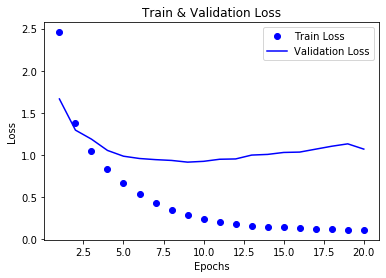

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Train Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Train & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

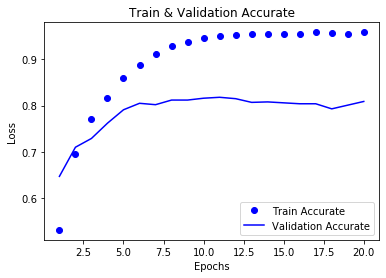

In [16]:
plt.clf()

acc = history.history['accuracy']
acc_val = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Train Accurate')
plt.plot(epochs, acc_val, 'b', label='Validation Accurate')
plt.title('Train & Validation Accurate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
# After 9 epochs NN is overfitted, I will do it again and stopped at 8 epochs then try with test data

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [19]:
model.fit(partial_x_train,
         partial_y_train,
         epochs=8,
         batch_size=512,
         validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 0s 23ms/step - loss: 2.6191 - accuracy: 0.5130 - val_loss: 1.7269 - val_accuracy: 0.6370
Epoch 2/8
16/16 [==============================] - 0s 20ms/step - loss: 1.4273 - accuracy: 0.7046 - val_loss: 1.3130 - val_accuracy: 0.7050
Epoch 3/8
16/16 [==============================] - 0s 20ms/step - loss: 1.0641 - accuracy: 0.7699 - val_loss: 1.1488 - val_accuracy: 0.7450
Epoch 4/8
16/16 [==============================] - 0s 20ms/step - loss: 0.8454 - accuracy: 0.8213 - val_loss: 1.0447 - val_accuracy: 0.7720
Epoch 5/8
16/16 [==============================] - 0s 20ms/step - loss: 0.6770 - accuracy: 0.8568 - val_loss: 0.9919 - val_accuracy: 0.7790
Epoch 6/8
16/16 [==============================] - 0s 20ms/step - loss: 0.5459 - accuracy: 0.8859 - val_loss: 0.9414 - val_accuracy: 0.7970
Epoch 7/8
16/16 [==============================] - 0s 20ms/step - loss: 0.4404 - accuracy: 0.9073 - val_loss: 0.9232 - val_accuracy: 0.8130
Epoch 8/8
71/71 [===

In [20]:
results

[0.9964550733566284, 0.7813891172409058]

In [21]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy) # thats only for fun, check how its work with random classification 
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

In [22]:
# NN had accurate 78% when random classification had 18% 

In [23]:
predictions = model.predict(x_test)

In [24]:
predictions[0].shape

(46,)

In [25]:
np.sum(predictions[0])

1.0

In [26]:
np.argmax(predictions[0])

3

In [27]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [28]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',   # When we use integers in vector we need to change a little out loss func, this func work the same way but can work with integers
             metrics=['acc'])

In [30]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # Let's see what happen when use 4 units before 46 output
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=128,
         validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 3.3103 - accuracy: 0.2273 - val_loss: 2.8098 - val_accuracy: 0.2790
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 2.3601 - accuracy: 0.2983 - val_loss: 1.9364 - val_accuracy: 0.6180
Epoch 3/20
63/63 [==============================] - 1s 9ms/step - loss: 1.5182 - accuracy: 0.6372 - val_loss: 1.4685 - val_accuracy: 0.6510
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.2398 - accuracy: 0.6807 - val_loss: 1.3878 - val_accuracy: 0.6670
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1157 - accuracy: 0.7030 - val_loss: 1.3665 - val_accuracy: 0.6700
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0219 - accuracy: 0.7234 - val_loss: 1.3462 - val_accuracy: 0.6940
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.9418 - accuracy: 0.7353 - val_loss: 1.3287 - val_accuracy: 0.6960
Epoch 8/20
63/63 [

In [ ]:
# Validation accurate drop down from 79% to 71%, this happened when we use not enough units

In [ ]:
# Let's do it one more time, now i will use only one layer but with 128 units

In [33]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=20,
         batch_size=256,
         validation_data=(x_val, y_val))

Epoch 1/20
32/32 [==============================] - 1s 20ms/step - loss: 1.9270 - accuracy: 0.6448 - val_loss: 1.2438 - val_accuracy: 0.7310
Epoch 2/20
32/32 [==============================] - 1s 18ms/step - loss: 0.9308 - accuracy: 0.8073 - val_loss: 0.9907 - val_accuracy: 0.8000
Epoch 3/20
32/32 [==============================] - 1s 18ms/step - loss: 0.6078 - accuracy: 0.8826 - val_loss: 0.9041 - val_accuracy: 0.8030
Epoch 4/20
32/32 [==============================] - 1s 18ms/step - loss: 0.4264 - accuracy: 0.9136 - val_loss: 0.8327 - val_accuracy: 0.8250
Epoch 5/20
32/32 [==============================] - 1s 18ms/step - loss: 0.3136 - accuracy: 0.9346 - val_loss: 0.8166 - val_accuracy: 0.8320
Epoch 6/20
32/32 [==============================] - 1s 18ms/step - loss: 0.2437 - accuracy: 0.9441 - val_loss: 0.8352 - val_accuracy: 0.8320
Epoch 7/20
32/32 [==============================] - 1s 18ms/step - loss: 0.1997 - accuracy: 0.9488 - val_loss: 0.9100 - val_accuracy: 0.8110
Epoch 8/20
32

In [34]:
predictions = model.predict(x_test)

In [35]:
np.argmax(predictions[0])

3

In [ ]:
# One more time with 3 layers

In [39]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

model.fit(partial_x_train,
         partial_y_train,
         epochs=10,
         batch_size=256,
         validation_data=(x_val, y_val))

Epoch 1/10
32/32 [==============================] - 1s 23ms/step - loss: 1.8657 - acc: 0.5895 - val_loss: 1.3452 - val_acc: 0.7150
Epoch 2/10
32/32 [==============================] - 1s 25ms/step - loss: 0.9709 - acc: 0.7816 - val_loss: 1.0445 - val_acc: 0.7580
Epoch 3/10
32/32 [==============================] - 1s 17ms/step - loss: 0.6349 - acc: 0.8534 - val_loss: 1.0951 - val_acc: 0.7650
Epoch 4/10
32/32 [==============================] - 1s 19ms/step - loss: 0.4212 - acc: 0.9078 - val_loss: 1.0543 - val_acc: 0.7760
Epoch 5/10
32/32 [==============================] - 1s 21ms/step - loss: 0.3035 - acc: 0.9347 - val_loss: 1.0880 - val_acc: 0.7830
Epoch 6/10
32/32 [==============================] - 1s 18ms/step - loss: 0.2272 - acc: 0.9449 - val_loss: 1.1697 - val_acc: 0.7690
Epoch 7/10
32/32 [==============================] - 1s 19ms/step - loss: 0.1925 - acc: 0.9508 - val_loss: 1.0653 - val_acc: 0.8030
Epoch 8/10
32/32 [==============================] - 1s 19ms/step - loss: 0.1665 - a